<a href="https://colab.research.google.com/github/dianabisbe/Python_AI-Projects/blob/main/nltk_gab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries

import pandas as pd
import nltk

nltk.download('all')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [96]:
# Load the data from the Excel file into a Pandas DataFrame.
# Only select the 'Description' column as we are looking to perform
# our analysis on it

pd.set_option('display.max_colwidth', 1000)
df = pd.read_excel('sessions.xlsx', usecols=['Description']).apply(str)

#print (df['Description'])

In [ ]:
# Load the Excel file
import openpyxl
wb = openpyxl.load_workbook('sessions.xlsx')
sheet = wb.active

# Get the 'Description' column and convert it to a list of strings
description_column = sheet['C']
description_list = [cell.value for cell in description_column]

# Join the list of strings into a single string
description_string = '\n'.join(str(d) for d in description_list)

# Print the resulting string
print(description_string)

In [ ]:
# Convert the text in the description column to lowercase and tokenize it.

tokens = word_tokenize(description_string.lower())

print(tokens)


In [ ]:
nltk.download('wordnet')

In [100]:
# Remove stop words and other unwanted parts of speech

# Define stopwords for both English and Spanish
en_stopwords = set(stopwords.words('english'))
es_stopwords = set(stopwords.words('spanish'))

# Removing unwanted parts of the Speech
unwanted_pos = {'PRP', 'PRP$', 'IN', 'DT', 'CC', 'TO', 'MD', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'}

# Define your own set of unwanted words
my_list = ['sesion', 'session', 'sesión', 'hablar', 'hablaremos', 'veremos', 'buenas']
filtered_tokens = [token for token in tokens if token not in en_stopwords and token not in es_stopwords and token not in my_list and token not in unwanted_pos and token.isalpha()]

# Lemmatize the tokens
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

# Join the tokens back into a string
#processed_text = ' '.join(lemmatized_tokens)
tagged_text = nltk.pos_tag(filtered_tokens)
cleaned_text = [word[0] for word in tagged_text if word[1] not in unwanted_pos]


print(cleaned_text)


['description', 'power', 'apps', 'power', 'automate', 'tarea', 'fácil', 'tips', 'cómo', 'asegurar', 'solución', 'power', 'platform', 'licenciamiento', 'correcto', 'morir', 'intento', 'power', 'query', 'excelente', 'herramienta', 'importar', 'explorar', 'limpiar', 'transformar', 'datos', 'ejemplo', 'cero', 'modelo', 'tabular', 'power', 'bi', 'intentaré', 'bajo', 'punto', 'vista', 'principiante', 'ver', 'diferencias', 'filtros', 'marcadores', 'crear', 'pequeño', 'informe', 'comparándolos', 'trimestres', 'anterior', 'top', 'ten', 'experiencia', 'área', 'tecnología', 'mantenerse', 'vigente', 'whole', 'career', 'typically', 'woman', 'room', 'never', 'token', 'female', 'yet', 'room', 'truly', 'belonged', 'feel', 'imposter', 'camouflage', 'need', 'women', 'leadership', 'positions', 'diversity', 'different', 'life', 'experience', 'approach', 'best', 'time', 'camouflage', 'think', 'great', 'leader', 'wrong', 'ask', 'people', 'leadership', 'qualities', 'choose', 'words', 'bold', 'powerful', 'fea

In [101]:
# Calculate the frequency distribution of the cleaned text
fdist = FreqDist(cleaned_text)


In [104]:
# Generate a word cloud of the most common themes
wordcloud = WordCloud(width=900, height=800, background_color='white').generate_from_frequencies(fdist)

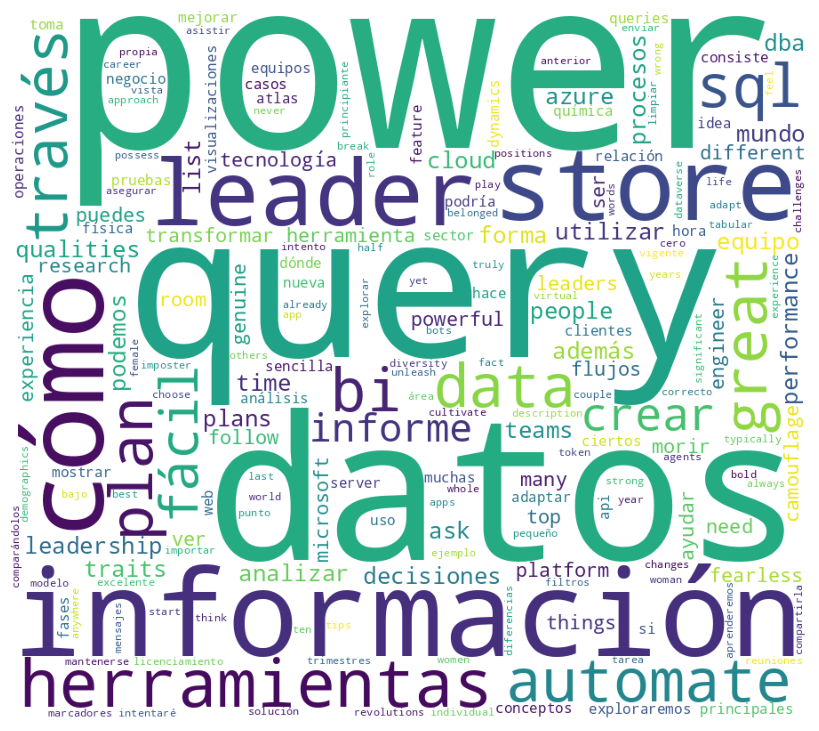

In [105]:
# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()